In [1]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

from convenience_functions import get_mnist

from NetworkModules.Network import Network
from NetworkModules.Layers import *
from NetworkModules.Activations import *
from NetworkModules.LossFunctions import *  


In [2]:
train_X, train_Y, test_X, test_Y = get_mnist("C:/Users/nisha/project_repositories/MNIST_from_scratch/MNIST_From_Scratch/dataset")


print(f'Train X shape = {train_X.shape}')
print(f'Train Y shape = {train_Y.shape}')
print(f'Test  X shape  = {test_X.shape}')
print(f'Test  Y shape  = {test_Y.shape}')


Train X shape = (60000, 784)
Train Y shape = (60000, 10)
Test  X shape  = (10000, 784)
Test  Y shape  = (10000, 10)


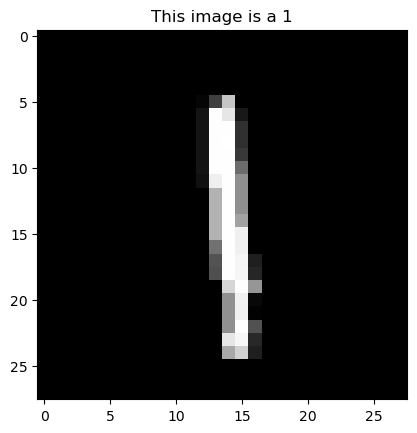

In [3]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = 8
image = train_X[sample].reshape(28, 28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title(f'This image is a {int(np.argwhere(train_Y[sample]== 1))}')
plt.show()

In [4]:
net = Network()
net.add_layer(FullyConnectedLinearLayer(784, 128))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=False, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(128, 64))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=False, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(64, 10))
net.add_layer(ActivationLayer(softmax, dsoftmax))

net.set_loss(cross_entropy_loss, dcross_entropy_loss)

net.load_data( train_X[0:60000,:].T, train_Y[0:60000,:].T, test_X[0:10000,:].T, test_Y[0:10000,:].T)

net._reinitalize_weights()

def accuracy_metric(X, Y):
    return (np.argmax(net.inference(X), axis=0) == np.argmax(Y, axis=0)).sum() / Y.shape[1] * 100

net.add_accurace_function(accuracy_metric)


net._mini_batch_gradient_descent(learning_rate=0.01, epochs=100, batch_size = 128, L2_reg = True, L2_lambda = 0.01)



iter       Loss      Train Accuracy        Val Accuracy
1          1.04                82.6               83.58
6          0.35                89.9               90.74
11         0.31               91.09               91.67
16         0.29               91.58               91.99
21         0.28               91.91               92.11
26         0.27               92.06               92.29
31         0.27                92.2               92.39
36         0.27                92.3                92.5
41         0.26               92.37               92.52
46         0.26               92.43               92.59
51         0.26               92.46               92.59
56         0.26                92.5               92.62
61         0.26               92.51               92.62
66         0.26               92.53               92.63
71         0.26               92.54               92.65
76         0.26               92.56               92.66
81         0.26               92.56             

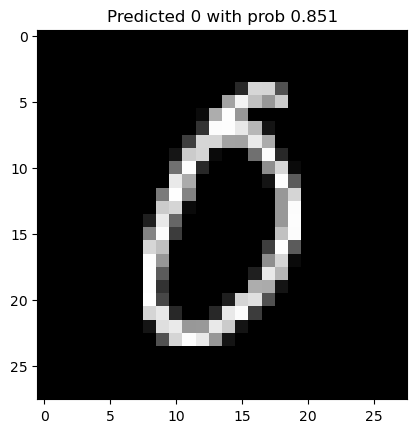

In [13]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = 3698
image = test_X[sample].reshape(28, 28)

example = test_X[sample].reshape(784, 1)
y_out= net.inference(example)

ind = np.argmax(y_out)


# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')

plt.title(f'Predicted {ind} with prob {round(float(y_out[ind]),3)}')
plt.show()

In [ ]:



# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]]).T
y_train = np.array([[0], [1], [1], [0]]).T


net = Network()
net.add_layer(FullyConnectedLinearLayer(2, 3))
net.add_layer(ActivationLayer(tanh, dtanh))
net.add_layer(FullyConnectedLinearLayer(3, 1))
net.add_layer(ActivationLayer(tanh, dtanh))

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train)

net.add_accurace_function(mse_loss)

net._stochastic_gradient_descent(learning_rate=0.1, epochs=100)

In [ ]:
from scipy.io import loadmat

dat = {}
NN_data = loadmat('dataset/NN_proj_data_10.mat', mdict = dat)

In [ ]:
x_train = dat['inp_train']
y_train = dat['y10']

x_valid = dat['inp_valid']
y_valid = dat['y10val']

net = Network()
net.add_layer(FullyConnectedLinearLayer(1, 2))
net.add_layer(ActivationLayer(tanh, dtanh))
net.add_layer(FullyConnectedLinearLayer(2, 2))
net.add_layer(ActivationLayer(tanh, dtanh))
net.add_layer(FullyConnectedLinearLayer(2, 1))


# net.add_layer(ActivationLayer(tanh, dtanh))

# net._reinitalize_weights()

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train, x_valid, y_valid)


def mse_accuracy(X, Y):
    return np.sum(np.power(net.inference(X) - Y, 2))

net.add_accurace_function(mse_accuracy)

net._batch_gradient_descent(learning_rate=0.1, epochs=500)



In [ ]:
x_valid = dat['inp_valid']
y_valid = dat['y10val']

val_output = net.inference(x_valid)

np.mean(np.power(val_output - y_valid, 2))



In [ ]:
y_valid

In [ ]:
net.inference(x_valid)